In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
boston_data = datasets.load_boston()
# print(boston_data.DESCR) #DESCR is the full description of the dataset

In [4]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df_target = np.asarray(boston_data.target)
boston_df['House Price'] = pd.Series(boston_df_target)
X = boston_df.iloc[:, :-1]
Y = boston_df.iloc[:, -1]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#splittling the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape))

Shape of train data of X = (379, 13) and Y = (379,) 
Shape of test data of X = (127, 13) and Y = (127,)


In [6]:
#As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model 
# very much and need to regulate or even eliminate some of these variables.

In [7]:
# In Lasso Regression, we add Mean Absolute Value of coefficients.
# Lasso regression can completely eliminate the variable by reducing its coefficient value to 0.

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [9]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  48.77294475883394


In [10]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [11]:
# print(mean_squared_error(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))
print(mean_absolute_error(y_test,y_pred1))
print(explained_variance_score(y_test,y_pred1))
print(r2_score(y_test,y_pred1))

6.983762936901133
4.779780409095173
0.6410139582509529
0.6046532590844487


In [12]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.050817
1        ZN              0.039043
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.087947
6       AGE              0.032541
7       DIS             -0.324632
8       RAD              0.268407
9       TAX             -0.013148
10  PTRATIO             -0.514617
11        B              0.006949
12    LSTAT             -0.834208


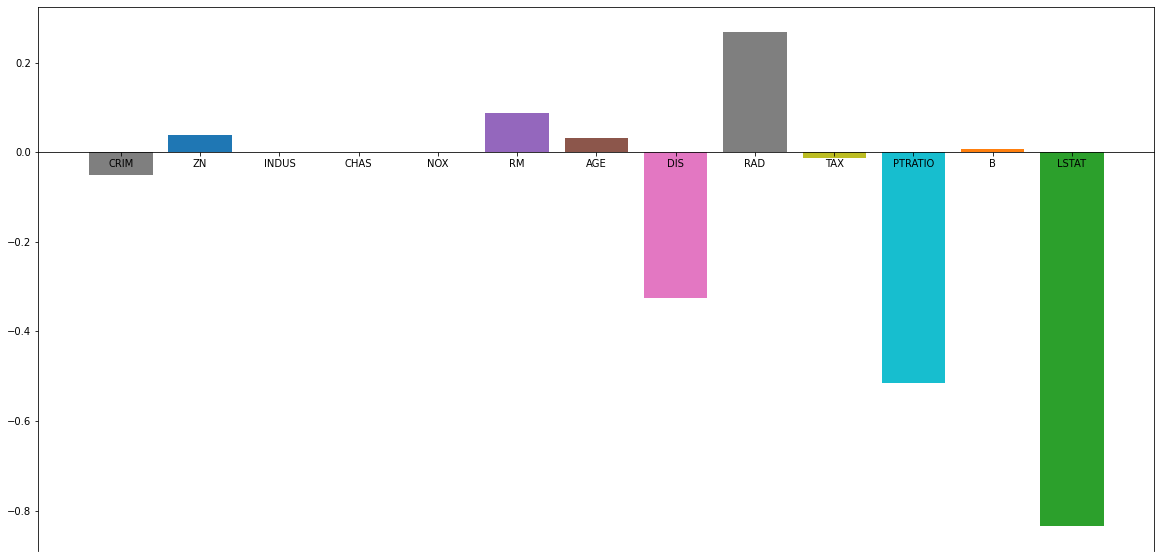

In [13]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lasso_coef["Columns"],  
lasso_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show()

In [14]:
# Lasso Regression will try to add one feature at a time, and if the new feature dosen't 
# improves the fit enough to overweigh penalty term including that feature, then it won't be added.